__Before you turn the assignment in, make sure everything runs as expected__. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). __Use the__ `Validate` __button in the Assignments tab before submitting__ to make sure that your assignment was filled in properly.

__Make sure you fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE". __Only one team member should upload the solutions.__

__Please fill in your names and S/U-numbers here:__
* Student 1 name, S/U-number: s1046670
* Student 2 name, S/U-number: 
* Student 3 name, S/U-number:

---

# Statistical Machine Learning 2022
# Assignment 1
# Deadline: 6 October 2022
## Instructions
* You can __work in groups__ (= max 3 people). __Write the full name and S/U-number of all team members in the header above.__
* __Make sure you fill in any place that says__ `YOUR CODE HERE` or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. (Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code.) If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells to the notebook, try to write the answers only in the provided cells. __Before you turn the assignment in, make sure everything runs as expected__. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). __Use the__ `Validate` __button in the Assignments tab before submitting__ to make sure that your assignment was filled in properly.
* The assignment includes certain cells that contain tests. Most of the tests are marked as *hidden* and are used for automatic grading. NB: These hidden tests do not provide any feedback! There are also a couple of tests / checks that are visible, which are meant to help you avoid basic coding errors.
* __For those working in groups, only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.
* For any problems or questions regarding the assignments, write on Discord or send an email to G.Bucur@cs.ru.nl .

## Introduction
Assignment 1 consists of:
1. Polynomial curve fitting (50 points);
2. __Gradient descent (25 points);__
3. Fruit boxes (25 points);
4. Probability factorization (BONUS 10 points);

## Libraries

First, we import the basic libraries necessary to develop this assignment. Of course you are free to import further libraries, if required, in the allotted cells. **Please avoid installing new packages, unless really necessary. Keep in mind that they will be installed in your "home-directory" folder, which has limited diskspace available.**

In [1]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it to at least version 3."

# Necessary imports (for solutions)
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Gradient descent (weight 25)
In this exercise, we consider the gradient descent algorithm for function minimization. When the function to be minimized is $E(\mathbf{x})$, the gradient descent iteration is  
\begin{equation*}
\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla E(\mathbf{x}_n) \tag{6}
\end{equation*}
where $\eta>0$ is the so-called learning-rate. In the following, we will apply gradient descent to the function
\begin{equation*}
h(x,y) = 100(y - x^2)^2 +(1 - x)^2 \tag{7}
\end{equation*}
### Exercise 2.1
Make a plot of the function $h$ over the interval $[-2 \leq x \leq 2] \times [-1 \leq y \leq 3]$. (Tip: Use the `plot_surface` function.) Can you guess from the plot if numerical minimization with gradient descent will be fast or slow for this function?

Fast: the gradient is always pointing towards the minimum, because from any point on surface, there is at least one gradient pointing towards the minimum.

In [11]:
"""
Create function h.
"""
def h(x,y):
    return 100 * (y-x**2)**2 + (1-x)**2

"""
Declare x and y.
"""    
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-1, 3, 100)
x, y = np.meshgrid(x_range, y_range)


In [12]:
"""
Hidden test for function h.
"""

'\nHidden test for function h.\n'

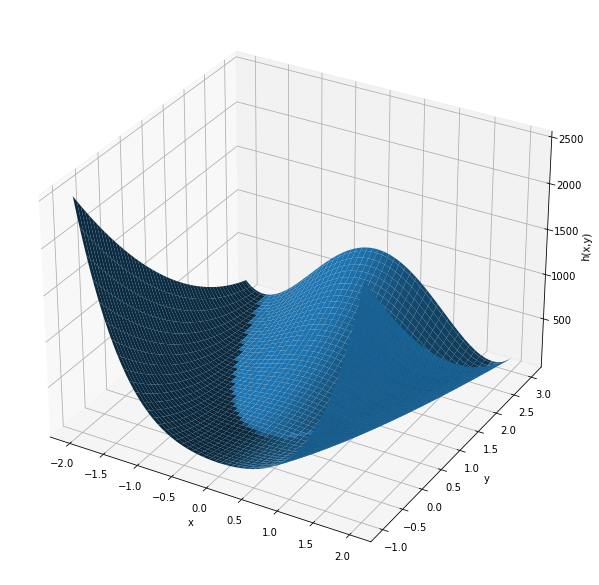

In [13]:
"""
Create a function to plot h.
"""


def plot_h(x,y):
    # YOUR CODE HERE
    zs = np.array(h(np.ravel(x), np.ravel(y)))
    z = zs.reshape(x.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('h(x,y)')

    fig.set_size_inches(18.5, 10.5)

    plt.show()

plot_h(x,y)

### Exercise 2.2
Knowing that a critical point of a function is a point where the gradient vanishes, show that $(1, 1)$ is the unique critical point of $h$.  Prove that this point is a minimum for $h$. 

\begin{equation*}
h(x,y) = 100(y - x^2)^2 +(1 - x)^2 \tag{7}
\end{equation*}

$$
\frac{\partial h}{\partial x} = \\ 
= \frac{\partial }{\partial x}[ 100(y - x^2)^2 +(1 - x)^2  ] \\
= -400x(y-x^2) - 2(1-x)
$$

$$
\frac{\partial h}{\partial y} = \\
= \frac{\partial h}{\partial y} [100(y - x^2)^2 +(1 - x)^2] \\
= 200(y-x^2)
$$

the first and second terms on the rhs are 0 if $x=1$ and $y=1$ meaning $h$ is also zero. The 

### Exercise 2.3
Write down the gradient descent iteration rule for function $h$. 

YOUR ANSWER HERE

### Exercise 2.4
Implement gradient descent. Try some different values of $\eta$. Does the algorithm converge? How fast? Make plots of the trajectories on top of a contour plot of $h$. (Hint: have a look at the example contour_example.py on Brightspace for inspiration to plot contours of functions and trajectories). Report your findings. Explain why numerical minimization with gradient descent is slow for this function.

First implement the derivative of $h(x,y)$.

In [ ]:
def dh_dxy(x, y):
    """
    This function is the derivative of the function h(x, y).
    
    Parameters
    ----------
    x : float
        data point from x-axis
    y : float
        data point from y-axis
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
"""
Test for dh_dxy.
"""
assert np.array_equal(dh_dxy(1, 1), np.array([0, 0]))

Now implement the gradient descent algorithm.

In [ ]:
def grad_descent(grad, val_init, eta, max_iter, tol):
    """ This function implements the gradient descent algorithm.
    
    Parameters
    ----------
    grad : function
        Returns the derivative of the function with respect to the pair (x, y).
    val_init : tuple
        Initial values for parameters
    eta : float
        Gradient descent learning rate
    max_iter : int
        Maximum number of gradient descent iterations
    tol : float
        Tolerance for detecting convergence
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    dists : array
        NumPy array of distances from the current point to the previous point
    tot_iter : int
        Number of performed gradient descent iterations
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
"""
Hidden test for grad_descent.
"""

Finally, run the gradient descent algorithm with different values of $\eta$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Explain what you see!

YOUR ANSWER HERE